Example of salience calculation for an image.

igraph not found, will not be able to convert graphs to igraph format.
Could not load skeleton library. Unable to calculate skeletons.
LSRecall for threshold 0.2: 0.16957605985037408


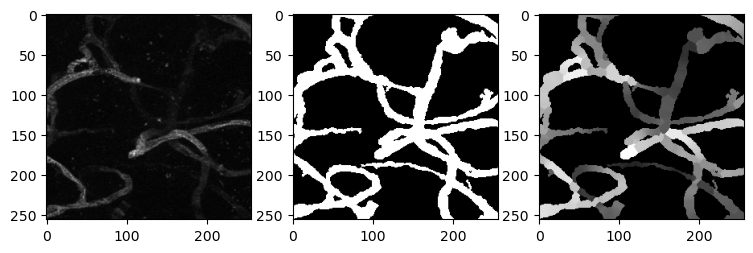

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

import sys
sys.path.insert(0, '../')
from vessel_salience import salience

img_path = '../data/original/images/16707.tiff'
bin_path = '../data/original/labels/16707.png'
threshold = 0.2

img_gray = np.array(Image.open(img_path), dtype=np.uint8)
img_bin = np.array(Image.open(bin_path), dtype=np.uint8)

# An arbitrary segmentation for illustration
pred = (img_gray>25).astype(np.uint8)

img_lvs = salience.lvs(
    img_gray,
    img_bin,
    radius=4    # Radius around each contour point to include background values
)

recall = salience.ls_recall(
    img_lvs,
    img_bin,
    pred,
    threshold=threshold     # Salience threshold
)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(9,3))
ax1.imshow(img_gray, 'gray')
ax2.imshow(img_bin, 'gray')
ax3.imshow(img_lvs, 'gray')
print(f'LSRecall for threshold {threshold}: {recall}')


The cell below plots the regions used for sampling the vessel and background intensities around some example medial axis pixels

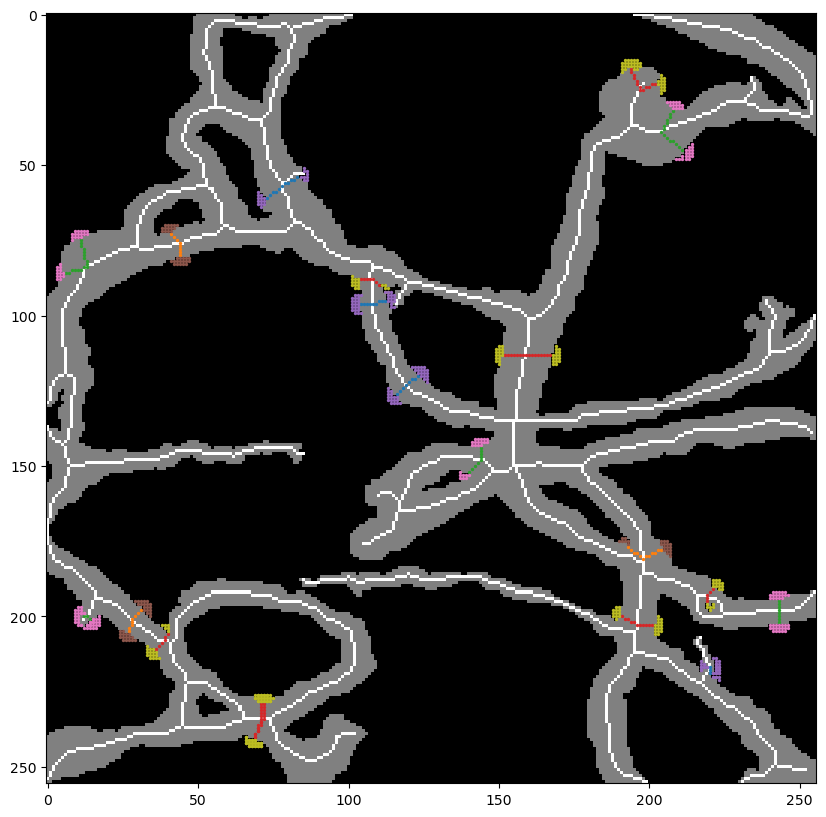

In [2]:
graph = salience.get_graph(img_bin)
contour = salience.get_contour(img_bin)
closest_points = salience.get_closest_points(graph, contour)
section_data = salience.get_intensities(img_gray,img_bin, graph, contour, closest_points, radius=4)
salience.plot_sampling_regions(section_data, img_bin, graph, n=20)